# Vectores

El concepto de vector tiene dos significados ligeramente diferentes si lo observamos desde el punto de vista de la matemática o desde el punto de vista de la computación. Cuando hacemos ciencia de datos, solemos tomarnos la libertad de llamar vectores a ciertas estructuras de datos que, si lo analizamos estrictamente desde el sentido matemático, no lo son.


## Definición matemática

En matemática, un vector es un **segmento de recta orientado**, que depende de un **sistema de coordenadas**.

Los vectores son muy usados en física para representar a las llamadas magnitudes vectoriales, que son aquellas que están dotadas de intensidad (o módulo), dirección y sentido. Un ejemplo es el caso de la fuerza, la velocidad o el desplazamiento. Ese rasgo de contar con dirección es el que distingue a las magnitudes vectoriales de las escalares.

### Características geométricas

- **Dirección**: la dirección de un vector corresponde a la dirección de la recta que contiene el vector o cualquier recta paralela a ella. Dicho con otras palabras, la dirección de un vector es la línea recta sobre la que está situado.

- **Sentido**: el sentido de un vector es la orientación de dicho vector, lo indica su flecha.

- **Módulo**: el módulo de un vector es su longitud, y corresponde al valor numérico del vector. Por lo tanto, cuanto mayor sea el vector significa que más grande es la magnitud vectorial que representa.

- **Punto de aplicación**: el punto de aplicación de un vector es el origen de dicho vector.


<img width=250 src="./Images/Vectores.png">

<img src="Images/Vectores.png" alt="Descripción de la imagen" width="250">

![](Images\Vectores.png)


Nota: por convención, los vectores generalmente se presentan en forma de columnas.

##  Definición en computación

En computación se le suele llamar vector a los arreglos unidimensionales que son un tipo de datos estructurado que está formado por una colección **finita y ordenada** de datos **del mismo tipo**. 

Los vectores computacionales son muy usados en machine learning, sobre todo para representar **observaciones** y **predicciones**. Por ejemplo, supongamos que construimos un sistema de aprendizaje automático para clasificar videos en 3 categorías (bueno, spam, clickbait) según lo que sabemos sobre ellos. Para cada video, podríamos construir un vector que representa lo que sabemos sobre él:

**video** $= \begin{pmatrix}
10.5 \\
5.2 \\
3.25 \\
7.0
\end{pmatrix}$

Este vector podría representar un video que dura 10.5 minutos, pero solo el 5.2% de los espectadores miran más de un minuto; obtiene un promedio de 3.25 vistas por día y se marcó 7 veces como spam. **Cada componente puede tener un significado diferente**.

Según este vector, nuestro sistema de aprendizaje automático puede predecir que existe un 80% de probabilidad de que sea un video no deseado, un 18% de que sea clickbait y un 2% de que sea un buen video. Esto podría representarse como el siguiente vector:

**probabilidades_de_clase** $= \begin{pmatrix}
0.80 \\
0.18 \\
0.02
\end{pmatrix}$

## Vectores en python

En python, un vector se puede representar de muchas maneras, la más simple es una lista de números de python:

In [1]:
[10.5, 5.2, 3.25, 7.0]

[10.5, 5.2, 3.25, 7.0]

Dado que planeamos hacer una gran cantidad de cálculos científicos, es mucho mejor usar `nparray` de NumPy, que proporciona muchas implementaciones convenientes y optimizadas de operaciones matemáticas esenciales en vectores. Por ejemplo:

In [2]:
import numpy as np
video = np.array([10.5, 5.2, 3.25, 7.0])
video

array([10.5 ,  5.2 ,  3.25,  7.  ])

In [3]:
video.size

4

In [4]:
video[1]

5.2

El iésimo elemento (en la posición i) de un vector $\textbf{v}$ se anota como $\textbf{v}_i$.

Nota: Tenga en cuenta que los índices en matemáticas generalmente comienzan en 1, pero en programación generalmente comienzan en 0.

### Graficar vectores

Para graficar vectores usaremos matplotlib, así que comencemos importándolo, creando dos vectores bidimensionales y representándolos como puntos:

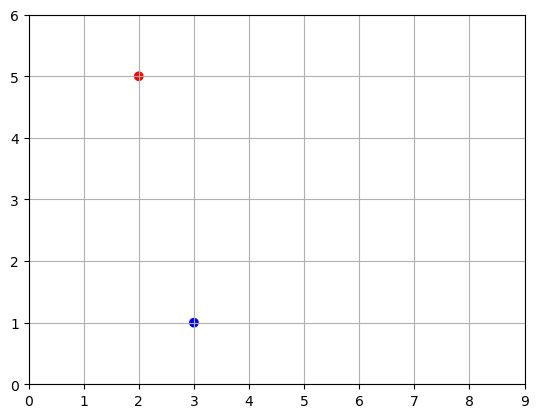

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

u = np.array([2, 5])
v = np.array([3, 1])

x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

Los vectores también se pueden representar como flechas. Vamos a crear una pequeña función para dibujar las flechas:

In [12]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

Notemos la flexibilidad para definir el origen del vector.

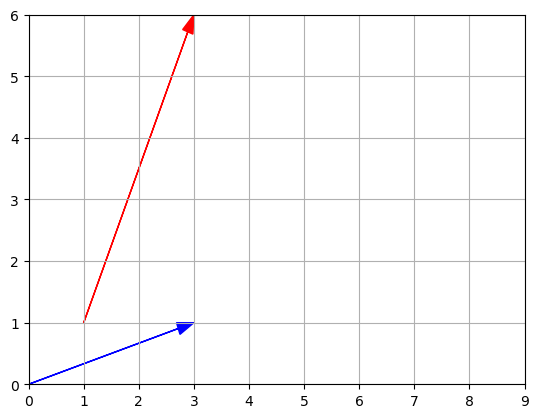

In [17]:
plot_vector2d(u, origin=[1,1], color="r") # Este vector tiene un punto de aplicación no trivial.
plot_vector2d(v, color="b")
#plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

### Vectores 3D

Dibujar vectores 3D usando `Axes3D` de matplotlib:

In [22]:
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

Agreguemos algunas líneas verticales y horizontales para visualizar. Crearemos una pequeña función para trazar una lista de vectores 3D con líneas perpendiculares a los ejes:

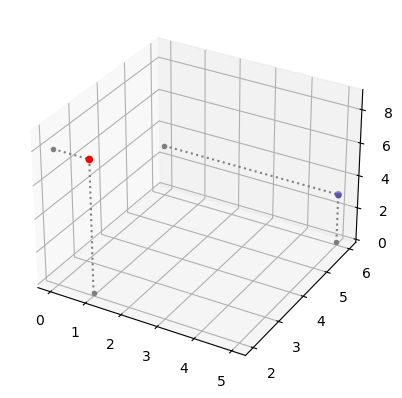

In [27]:
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
        ax.plot([0,x], [y,y], [z, z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

## Propiedades 

### Norma

La norma de un vector $\textbf{u}$, anotada $\left \Vert \textbf{u} \right \|$, es una medida de la longitud (también conocida como la magnitud) de $\textbf{u}$. Hay múltiples normas posibles, pero la más común (y la única que discutiremos aquí) es la norma euclidiana, que se define como:

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

Podríamos implementar esto fácilmente en Python puro, recordando que $\sqrt x = x^{\frac{1}{2}}$

In [12]:
u

array([2, 5])

In [30]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    #print(squares)
    return sum(squares)**0.5

print("||", u, "|| =", vector_norm(u))

|| [2 5] || = 5.385164807134504


**Reminder:** $\quad \sqrt[b]{x^a} = x^{\frac{a}{b}}$

In [15]:
import numpy.linalg as LA
LA.norm(u)

5.385164807134504

**Plotiemos** un pequeño gráfico para confirmar que la longitud del vector $\textbf{v}$ es de hecho $\approx5.4$:

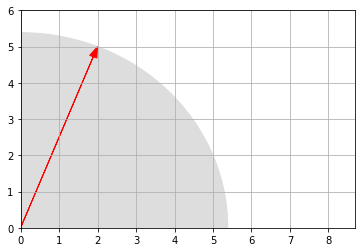

In [14]:
radius = LA.norm(u)
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plot_vector2d(u, color="r")
plt.axis([0, 8.7, 0, 6])
plt.grid()
plt.show()

**Nota:** Hay infinitos vectores de norma $5\sim5.39$, pero uno solo con inicio trivial y extremo en (2,5). 

### Adición y sustracción de vectores

Se pueden sumar vectores del mismo tamaño. La suma se realiza *elemento a elemento*:

In [19]:
w = np.array([4, 2])
print(" ", u)
print("+", v)
print("+", w)
print("-"*10)
u + v + w

  [2 5]
+ [3 1]
+ [4 2]
----------


array([9, 8])

Veamos cómo se ve gráficamente la suma de 2 vectores:

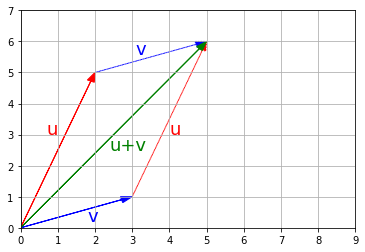

In [18]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

In [17]:
u+v

array([5, 6])

La suma de vectores es **conmutativa**, lo que significa que $\textbf{u} + \textbf{v} = \textbf{v} + \textbf{u}$. Puedes verlo en la imagen anterior: siguiendo $\textbf{u}$ *luego* $\textbf{v}$ lleva al mismo punto que siguiendo $\textbf{v}$ *luego* $\textbf{u} $

La suma de vectores también es **asociativa**, lo que significa que $\textbf{u} + (\textbf{v} + \textbf{w}) = (\textbf{u} + \textbf{v}) + \textbf{ w}$.

Finalmente, restar un vector es como sumar el vector opuesto.

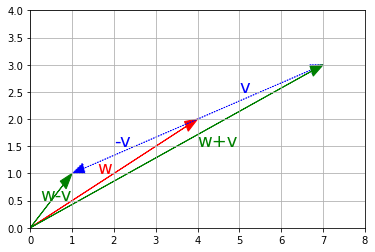

In [20]:
plot_vector2d(w, color="r")
plot_vector2d(v, origin=w, color="b", linestyle="dotted")
plot_vector2d(-v, origin=w, color="b", linestyle="dotted")
plot_vector2d(w+v, color="g")
plot_vector2d(w-v, color="g")
plt.axis([0, 8, 0, 4])
plt.text(1.6, 1, "w", color="r", fontsize=18)
plt.text(5, 2.5, "v", color="b", fontsize=18)
plt.text(2, 1.5, "-v", color="b", fontsize=18)
plt.text(4, 1.5, "w+v", color="g", fontsize=18)
plt.text(0.25, 0.5, "w-v", color="g", fontsize=18)
plt.grid()
plt.show()

In [21]:
w + (-v)

(-v) + w 

(array([4, 2]), array([3, 1]))

## Multiplicación por un escalar

Los vectores se pueden multiplicar por escalares. Todos los elementos del vector se multiplican por ese número, por ejemplo:

In [23]:
result = 2 * u
print("2 *", u, "=", result)

2 * [2 5] = [ 4 10]


In [22]:
u * 2

array([ 4, 10])

Gráficamente, la multiplicación por escalar da como resultado cambiar la escala de una figura, de ahí el nombre *escalar*. La distancia desde el origen (el punto en coordenadas iguales a cero) también se multiplica por el escalar.

Como puedes suponer, dividir un vector por un escalar es equivalente a multiplicar por su inverso multiplicativo:
$\dfrac{\textbf{u}}{\lambda} = \dfrac{1}{\lambda} \times \textbf{u}$

Nota: en este caso, estaría disminuyendo la escala!

<br>

La multiplicación por escalar es **conmutativa**: $\lambda \times \textbf{u} = \textbf{u} \times \lambda$.

También es **asociativa**: $\lambda_1 \times (\lambda_2 \times \textbf{u}) = (\lambda_1 \times \lambda_2) \times \textbf{u}$.

Finalmente, es **distributiva** sobre la suma de vectores: $\lambda \times (\textbf{u} + \textbf{v}) = \lambda \times \textbf{u} + \lambda \times \textbf{ v}$.

## Vectores nulos, unitarios y normalizados

* Un **vector nulo** es un vector lleno de ceros.


* Un **vector unitario** es un vector con una norma igual a 1.


* El **vector normalizado** de un vector no nulo $\textbf{u}$, anotado $\hat{\textbf{u}}$, es el vector unitario (o versor) que apunta en la misma dirección que $\textbf{u}$. Es igual a: $\hat{\textbf{u}} = \dfrac{\textbf{u}}{\left \Vert \textbf{u} \right \|}$

In [26]:
np.array([0, 0, 0])*5

array([0, 0, 0])

In [25]:
np.zeros(3)

array([0., 0., 0.])

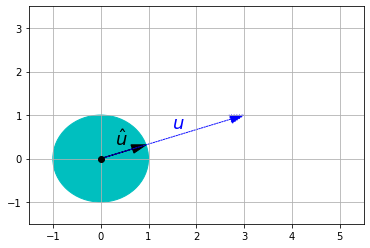

In [26]:
plt.gca().add_artist(plt.Circle((0,0),1,color='c'))
plt.plot(0, 0, "ko")
plot_vector2d(v / LA.norm(v), color="k")
plot_vector2d(v, color="b", linestyle=":")
plt.text(0.3, 0.3, "$\hat{u}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$u$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

## Producto escalar

### Definición

El producto punto (también llamado *producto escalar*) de dos vectores $\textbf{u}$ y $\textbf{v}$ es una operación útil que surge con bastante frecuencia en álgebra lineal. Se anota $\textbf{u} \cdot \textbf{v}$, o a veces $⟨\textbf{u}|\textbf{v}⟩$ o $(\textbf{u}|\textbf{v}) $, y se define como:

$\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$

donde $\theta$ es el ángulo entre $\textbf{u}$ y $\textbf{v}$.

Otra forma de calcular el producto escalar es:

$\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$

### En python
El producto punto es bastante simple de implementar:

In [32]:
print(u,".",v)

[2 5] . [3 1]


In [30]:
def dot_product(v1, v2):
    return sum(v1i * v2i for v1i, v2i in zip(v1, v2))

dot_product(u, v)

11

Pero NumPy proporciona una implementación *mucho* más eficiente con la función `dot`:

In [31]:
np.dot(u,v)

11

De manera equivalente, se puede usar el método `dot` de `ndarray`s:

In [32]:
u.dot(v)

11

**Precaución**: el operador `*` realizará una multiplicación *elemento a elemento*, *NO* un producto escalar:

In [29]:
print("  ",u)
print("* ",v, "(NOT a dot product)")
print("-"*10)

u * v

   [2 5]
*  [3 1] (NOT a dot product)
----------


array([6, 5])

In [34]:
sum(u*v)

11

### Propiedades principales

* El producto escalar es **conmutativo**: $\textbf{u} \cdot \textbf{v} = \textbf{v} \cdot \textbf{u}$.


* El producto escalar solo se define entre dos vectores, no entre un escalar y un vector. Esto significa que no podemos encadenar productos punto: por ejemplo, la expresión $\textbf{u} \cdot \textbf{v} \cdot \textbf{w}$ no está definida ya que $\textbf{u} \cdot \textbf{ v}$ es un escalar y $\textbf{w}$ es un vector.


* Esto también significa que el producto escalar **NO es asociativo**: $(\textbf{u} \cdot \textbf{v}) \cdot \textbf{w} ≠ \textbf{u} \cdot (\textbf{ v} \cdot \textbf{w})$ ya que ninguno está definido.


* Sin embargo, el producto escalar es **asociativo con respecto a la multiplicación escalar**: $\lambda \times (\textbf{u} \cdot \textbf{v}) = (\lambda \times \textbf{u}) \cdot \textbf{v} = \textbf{u} \cdot (\lambda \times \textbf{v})$


* Finalmente, el producto escalar es **distributivo** sobre la suma de vectores: $\textbf{u} \cdot (\textbf{v} + \textbf{w}) = \textbf{u} \cdot \textbf{v } + \textbf{u} \cdot \textbf{w}$.

Notaza: si $\textbf{u} \cdot \textbf{v} = 0$, se sigue que $\theta = \dfrac{π}{2}$. En otras palabras, si el producto escalar de dos vectores no nulos es cero, significa que son ortogonales.


### Proyectar un punto sobre un eje

El producto escalar también es muy útil para proyectar puntos en un eje. La proyección del vector $\textbf{v}$ sobre el eje de $\textbf{u}$ viene dada por esta fórmula:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| ^2} \times \textbf{u}$

Lo cual es equivalente a:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = (\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$


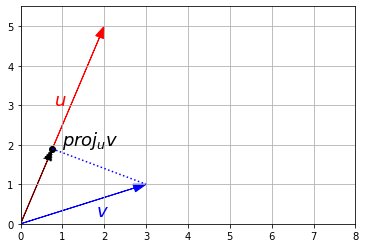

In [35]:
u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

plt.text(1, 2, "$proj_u v$", color="k", fontsize=18)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
plt.text(0.8, 3, "$u$", color="r", fontsize=18)

plt.axis([0, 8, 0, 5.5])
plt.grid()
plt.show()

## Aplicaciones de vectores al Machine Learning

### Embedding de personalidad: ¿Cómo somos?

¿Alguna vez ha realizado una prueba de personalidad como la prueba de los Cinco Grandes Rasgos de la Personalidad? Si no lo has hecho, estas son pruebas que te hacen una lista de preguntas, y luego te califican en una serie de ejes, siendo la introversión/extraversión uno de ellos.

En una escala de 0 a 100, ¿qué tan introvertido/extrovertido eres (donde 0 es el más introvertido y 100 es el más extrovertido)?

Imaginemos que Jay obtuvo una puntuación de 38/100 en el rasgo introversión/extraversión. Podemos graficar eso de esta manera:

<img width=350 src="Images/introversion-extraversion-100.png">

Supongamos que, además de ese, también contemplamos otro de los 5 rasgos (traits) y que las escalas de 0 a 100 son reemplazadas por una escala de -1 a 1. Así obtendríamos un vector que represente a Jay de la siguiente manera (ejemplo para dos features para poder graficarlo en el plano): 

<img width=450 src="Images/two-traits-vector.png">

Ahora podemos decir que este vector representa parcialmente la personalidad de Jay. La utilidad de tal representación viene cuando lo comparo con otras dos personas. Digamos que lo atropella un autobús y necesita ser reemplazado por alguien con una personalidad similar. En la siguiente figura, ¿cuál de las dos personas se parece más a Jay?

<img width=550 src="Images/personality-two-persons.png">

Podemos ver que la persona n° 1 es más parecida a Jay porque gráficamente su vector está más "cerca" al de Jay. Ahora supongamos que tenemos un vector con los 5 rasgos... el análisis gráfico no es una opción. Sin embargo, podemos calcular la similaridad a través del ángulo entre los vectores (que se calcula utilizando el coseno como ya vimos) para obtener una métrica que facilite la comparación.

<img width=550 src="Images/embeddings-cosine-personality.png">

Seguimos viendo que la persona más parecida es la n°1, pero ahora tenemos una métrica para saber cuán mejor reemplazo es con respecto a la otra persona.

#### Cálculo del ángulo entre vectores

Uno de los muchos usos del producto escalar es calcular el ángulo entre dos vectores no nulos. Mirando la definición del producto escalar, podemos deducir la siguiente fórmula:

Si $\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$

Entonces,

$\theta = \arccos{\left ( \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v } \right \|} \right ) }$

Nota: Siempre dos vectores generan un plano.

In [37]:
u = np.array([-0.4, 0.8])

v = np.array([-0.3, 0.2])

w = np.array([-0.5,-0.4])

def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

theta1 = vector_angle(u, v)
print("Angle with Person #1 =", theta1, "radians")
print("                     =", theta1 * 180 / np.pi, "degrees")
print()

theta2 = vector_angle(u, w)
print("Angle with Person #2 =", theta2, "radians")
print("                     =", theta2 * 180 / np.pi, "degrees")

Angle with Person #1 = 0.519146114246523 radians
                     = 29.74488129694223 degrees

Angle with Person #2 = 1.7818896600176433 radians
                     = 102.09475707701212 degrees


In [38]:
u.dot(v)

0.28

In [39]:
u.dot(w)

-0.12000000000000002

También podríamos ver la distancia entre las puntas de las flechas.

### Embedding de palabras: ¿Cómo codificamos el significado?

Para que las palabras sean procesadas por modelos de aprendizaje automático, necesitan alguna forma de representación numérica que los modelos puedan usar en sus cálculos: los vectores! 

Podemos proceder a observar ejemplos de vectores de palabras entrenados (también llamados embeddings de palabras).

Word2Vec fue el primer algoritmo en demostrar que podemos usar un vector para representar correctamente las palabras de una manera que capturara las relaciones semánticas o de significado. Por ejemplo, al analizar estos vectores podemos saber si las palabras son similares u opuestas (analizando la dirección y el sentido del vector), o que un par de palabras como “Estocolmo” y “Suecia” tienen entre ellas la misma relación que tienen “El Cairo” y “Egipto” (analizando las distancias entre los vectores), o también relaciones sintácticas o basadas en la gramática (por ejemplo, la relación entre “tenía” y “tengo” es la misma que entre “era” y “es”).

Este es un embedding para la palabra "rey" (vector GloVe entrenado en Wikipedia):

$$[ 0.50451 , 0.68607 , -0.59517 , -0.022801, 0.60046 , -0.13498 , -0.08813 , 0.47377 , -0.61798 , -0.31012 , -0.076666, 1.493 , -0.034189, -0.98173 , 0.68229 , 0.81722 , -0.51874 , -0.31503 , -0.55809 , 0.66421 , 0.1961 , -0.13495 , -0.11476 , -0.30344 , 0.41177 , -2.223 , -1.0756 , -1.0783 , -0.34354 , 0.33505 , 1.9927 , -0.04234 , -0.64319 , 0.71125 , 0.49159 , 0.16754 , 0.34344 , -0.25663 , -0.8523 , 0.1661 , 0.40102 , 1.1685 , -1.0137 , -0.21585 , -0.15155 , 0.78321 , -0.91241 , -1.6106 , -0.64426 , -0.51042 ] $$

El algoritmo codificó este vector como el mejor vector para representar la palabra rey. La Red Neuronal logró asignar un significado a cada una de estas 50 dimensiones; y crear vectores para cada una de las palabras con las que fue entrenada.

Pero visualicémoslo un poco para poder compararlo con otros vectores de palabras. Pongamos todos estos números en una fila y codifiquemos por colores las celdas según sus valores (rojo si están cerca de 2, blanco si están cerca de 0, azul si están cerca de -2):

<img width=950 src="Images/king-colored-embedding.png">

Ahora comparemos "Rey" con otras palabras:

<img width=450 src="Images/comparingwords.png">



Algunas cosas para señalar:

* Hay una columna roja recta a través de todas estas palabras diferentes. Son similares a lo largo de esa dimensión (y no sabemos qué codifica cada dimensión)


* Todas menos la última palabra son palabras que representan personas. Podemos, por ejemplo, ver que la columna azul va hacia abajo y se detiene antes del embedding de "agua".


* Hay lugares claros donde "rey" y "reina" son similares entre sí y distintos de todos los demás. ¿Podrían estar codificando un concepto vago de realeza? ¿De tamaños de camas? ¿De piezas de ajedrez? ¿Y si miro la palabra alfil?


* Puedes ver cómo "mujer" y "niña" son similares entre sí en muchos lugares. Lo mismo con "hombre" y "niño"


* “niño” y “niña” también tienen lugares donde son similares entre sí, pero diferentes de “mujer” u “hombre”. ¿Podrían estar codificando una vaga concepción de la juventud?

Otro ejemplo más que prueba lo poderosos que son estos embeddings es el concepto de las analogías. Podemos sumar y restar embeddings de palabras y llegar a resultados interesantes. El ejemplo más famoso es la fórmula: "rey" - "hombre" + "mujer":

<img width=450 src="Images/king-analogy-viz.png">

El vector resultante de "rey-hombre+mujer" no es exactamente igual a "reina", pero "reina" es la palabra más cercana de los 400 000 embeddings de palabras que tenemos en esta colección.

Algo importante que debe quedar claro es que, en contraste con los embeddings de personalidad que analizamos anteriormente, ***no sabemos que codifica cada dimensión del vector***. Podemos hacer conjeturas y experimentos que nos permitan validar que estos vectores están modelando de alguna u otra forma la semántica, pero esta codificación de los datos es la que a la red le pareció la más eficiente durante el entrenamiento. Para mayor información sobre los embeddings pueden consultar [este artículo](http://jalammar.github.io/illustrated-word2vec/) en el cual estuvo basado esta sección de la clase.

### Regresión Lineal Simple

La regresión lineal simple permite definir un modelo de recta que mejor se ajusta a una nube de puntos dada. 

<img width=250 src="Images/image003.jpg">

Es decir, dada una serie de observaciones de una variable independiente $x$ podemos encontrar una función lineal (una recta) para encontrar el valor de una variable dependiente $y$.

$$ y = \beta_0 + \beta_1 x + e$$

donde $\beta_0$ es la ordenada al origen de la recta, $\beta_1$ es la pendiente de la recta y $e$ es la distancia del punto a la recta.

El error de nuestro modelo está dado por el valor $e$ que es la diferencia entre el valor observado o real de la variable dependiente ($y$) y el valor predicho por la recta estimada ($\hat{y}$). Por lo tanto:

$$ \hat{y} = \beta_0 + \beta_1 x$$

$$ e = y - \hat{y} $$

Supongamos que tenemos $n$ observaciones para las variables $x$ e $y$ y para cada observación queremos calcular con nuestro modelo una predicción del valor de la variable dependiente $\hat{y}$. Nos conviene replantear las variables y las predicciones como vectores de la siguiente manera.

$$ \boldsymbol{x} = [x_1, x_2,...,x_n]$$
$$ \boldsymbol{y} = [y_1,y_2,...,y_n]$$
$$ \boldsymbol{\hat{y}} = [\hat{y}_1,\hat{y}_2,...,\hat{y}_n]$$

Y luego reformular las fórmulas anteriores usando operaciones entre vectores.

$$ \boldsymbol{\beta_0} = [\beta_0,  \beta_0, ..., \beta_0]$$
$$ \boldsymbol{\hat{y}} = \boldsymbol{\beta_0} + \beta_1 \boldsymbol{x}$$

Nota: $\beta_1 x$ es un escalar; la operación es un producto por un escalar con $\boldsymbol{x}$

Los valores de las variables $\boldsymbol{x}$  e $\boldsymbol{y}$ ya los tenemos en nuestra nube de puntos para la que queremos calcular la recta. Lo que variará en la ecuación de la recta que seleccionemos serán los coeficientes del modelo, $\beta_0$ y $\beta_1$ . \
¿Y qué coeficientes nos interesan? Lógicamente, aquellos con los que el el error sea lo menor posible. Dicho de otra forma, queremos la ecuación con un valor de la suma de residuos lo más bajo posible.

Sin embargo, el error $e$ debe ser reformulado ya que ahora tanto $\boldsymbol{\hat{y}}$ como $\boldsymbol{y}$ son vectores.

$$ \boldsymbol{e} = \boldsymbol{y}-\boldsymbol{\hat{y}}$$
$$ e = \sum_{i=1}^{n}\boldsymbol{e}_{i}$$

Ademas este error $e$ tiene otro problema y es que en ocasiones $\boldsymbol{e}_{i}$ será positivo (cuando $y$ sea mayor que $ \hat{y}$) y en otras será negativo (cuando $ \hat{y}$ sea mayor que $y$). Queremos contemplar todo error; el error debe sumar siempre! Por lo tanto, elevaremos cada resta al cuadrado para eliminar el problema del signo o, lo que es equivalente:

$$ \boldsymbol{e} = (\boldsymbol{y}-\boldsymbol{\hat{y}})$$
$$ e = \sum_{i=1}^{m}\boldsymbol{e}_{i}^2$$

Algo equivalente es hacer el producto punto del vector $e$ consigo mismo.

$$e=\boldsymbol{e} \cdot \boldsymbol{e}$$

Nota: Esto es mucho más eficiente dado que usamos la librería NumPy.

Al definir el error como la suma de los cuadrados de las diferencias entre los valores observados y predichos, el problema de encontrar los $\beta_0$ y $\beta_1$ óptimos se transforma en encontrar los **"mínimos cuadrados"**. Estos $\beta_0$ y $\beta_1$  óptimos se pueden encontrar utilizando derivadas que es un concepto que veremos dentro de algunas clases. Lo importante es que la fórmula para encontrarlos es la siguiente: 

$$\beta_1 = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$$

$$\beta_0 = \bar{y} - \beta_1\bar{x}$$

Nota: Estas fórmulas parecen sacadas de la galera. Para obtener estas fórmulas, es necesario saber calcular derivadas. La derivada nos permite encontrar máximos y mínimos de funciones; en este caso la función es el error y queremos calcular su mínimo para obtener la recta optima que minimiza el error!

La fórmula de $\beta_1$ puede parecer algo compleja, pero si la analizamos en detalle podemos convertirla en productos escalares ya que son sumas de productos indexados.

$$\boldsymbol{\bar{x}} = [\bar{x},\bar{x},...,\bar{x}]$$
$$\boldsymbol{\bar{y}} = [\bar{y},\bar{y},...,\bar{y}]$$
$$\beta_1 = \frac{(\boldsymbol{x}-\boldsymbol{\bar{x}})\cdot(\boldsymbol{y}-\boldsymbol{\bar{y}})}{(\boldsymbol{x}-\boldsymbol{\bar{x}})\cdot(\boldsymbol{x}-\boldsymbol{\bar{x}})}$$

$$\beta_0 = \bar{y} - \beta_1\bar{x}$$

#### Ejemplo práctico

Supongamos que tenemos la siguiente nube de puntos

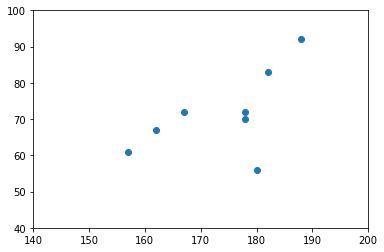

In [5]:
x = np.array([180, 157, 162,167,178,178,182,188])
y = np.array([56,61,67,72,70,72,83,92])
f, ax = plt.subplots(1)
ax.scatter(x, y)
ax.set_xlim(xmin=140, xmax=200)
ax.set_ylim(ymin=40, ymax=100)
plt.show(f)

Sai bien los puntos parecen tener una tendencia, vemos que existen outliers (puntos que nada que ver).

Programemos las fórmulas de la regresión lineal y grafiquemos la recta que más se aproxima a esos puntos:

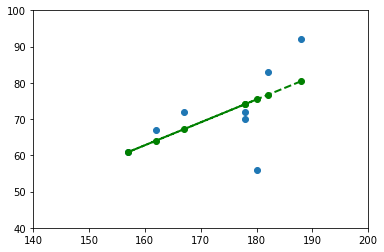

In [6]:
# El broadcasting se activa cuando operamos un vector -x- con un escalar -x.mean()-
# operando el escalar con cada elemento del vector
# En matemáticas está mal, en Python está PERFECTO!!

b1_num = (x - x.mean()).dot(y - y.mean())
b1_den = (x - x.mean()).dot(x - x.mean())
b1 = b1_num/b1_den
b0 = y.mean() - b1*x.mean()
y_hat = b0 + b1*x #nuestra predicción

#Graficamos
f, ax = plt.subplots(1)
ax.scatter(x, y)
ax.plot(x, y_hat, 'go--', linewidth=2)
ax.set_xlim(xmin=140, xmax=200)
ax.set_ylim(ymin=40, ymax=100)
plt.show(f)

Hubieses esperado una recta más alineada con los puntos de arriba? Eso se debe a que no hemos quitado los outliers y para minimizar el error para esos puntos, la recta se adaptó para tenerlos en cuenta.

Una buena estrategia sería eliminar dichos outliers y plotear la recta sin tenerlos en cuenta.

¿Cuál es el valor total del error?

In [7]:
e_vec = y - y_hat
e = np.dot(e_vec,e_vec)
e

603.5033950617287